## 클러스터링

### K-means Clustering

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


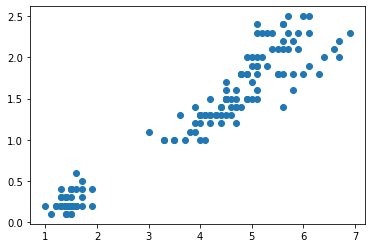

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print (iris_data_pd)

petals = pd.DataFrame(iris_data_pd.values[:,2:4], columns = ['petal length (cm)','petal width (cm)'])
plt.scatter(petals.values[:,0],petals.values[:,1])
plt.show()

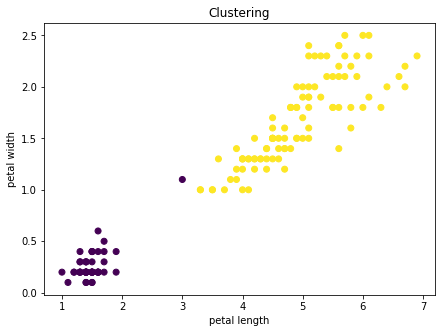

In [3]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7, 5))
km = KMeans(n_clusters= 2, random_state=20)
km.fit(iris_data_pd.iloc[:,2:4])
y_pred = km.predict(iris_data_pd.iloc[:,2:4])
plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [4]:
print(iris_data_pd.iloc[98,2:4])
km.cluster_centers_

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [5]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared)
    return result
print ('0 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[0][0],
km.cluster_centers_[0][1]))
print ('1 cluster distance: ', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3], km.cluster_centers_[1][0],
km.cluster_centers_[1][1]))

0 cluster distance:  1.7246990164733285
1 cluster distance:  2.0112458036464465


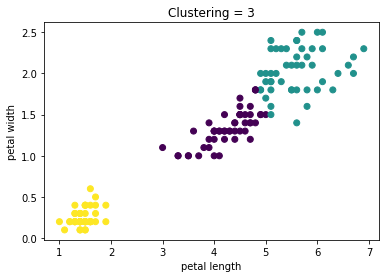

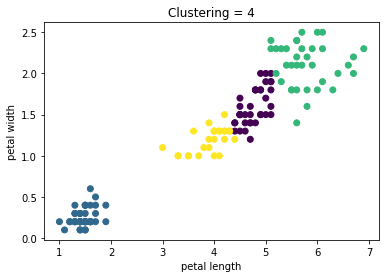

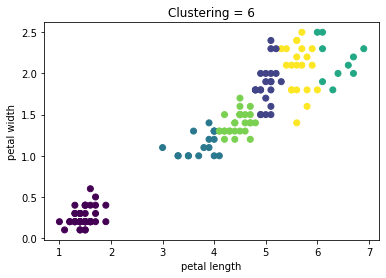

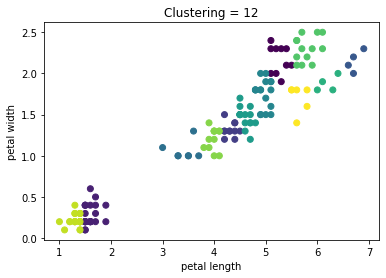

In [6]:
n_cluster = [3,4,6,12]
for i in n_cluster:
    count = 1
    km = KMeans(n_clusters= i, random_state=20)
    km.fit(iris_data_pd.iloc[:,2:4])
    y_pred = km.predict(iris_data_pd.iloc[:,2:4])
    plt.figure(count)
    plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred)
    plt.title("Clustering = "+ str(i))
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    count=count+1
    plt.show()

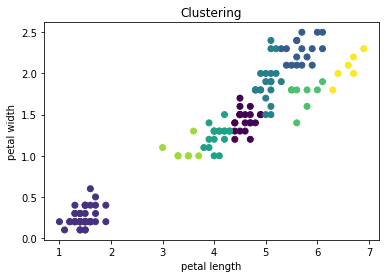

In [7]:
km12 = KMeans(n_clusters= 8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:,2],iris_data_pd.iloc[:,3], c=y_pred12)
plt.show()
h = .02 # point in the mesh [x_min, x_max]x[y_min, y_max].
km12 = KMeans(n_clusters= 8, random_state=20)
km12.fit(iris_data_pd.iloc[:,2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:,2:4])
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = iris_data_pd.iloc[:, 2].min() - 1, iris_data_pd.iloc[:, 2].max() + 1
y_min, y_max = iris_data_pd.iloc[:, 3].min() - 1, iris_data_pd.iloc[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<!--  -->

/Users/emilynan/Desktop/Daeyeon/ICT_AI_Class/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


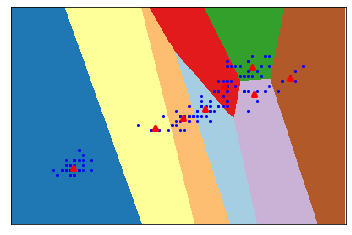

In [8]:
# Obtain labels for each point in mesh. Use last trained model.
Z = km12.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto',
origin='lower')
plt.plot(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], 'bo', markersize=2)
# Plot the centroids as a white X
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()